In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rc
import missingno as msno

#엑셀파일 읽어오기
train_df = pd.read_csv('./data/train_data.csv')
train_df.head()

#Target 파일 읽어오기
train_df_target = pd.read_csv('./data/train_target.csv')
train_df_target.head()

,td,code,target
0,T001,A005,-0.041401
1,T001,A006,-0.010438
2,T001,A007,-0.042630
3,T001,A011,0.109743
4,T001,A012,0.058011


In [75]:
#테스트 데이터 추출
test_before_t221 = train_df.drop(train_df.index[66452:])
target_before_t221 = train_df_target.drop(train_df.index[66452:])
test_after_t221 = train_df.drop(train_df.index[:66452])
target_after_t221 = train_df_target.drop(train_df.index[:66452])

#set_index 설정하기
test_before_t221 = test_before_t221.set_index(['td', 'code'])
target_before_t221 = target_before_t221.set_index(['td', 'code'])
test_after_t221 = test_after_t221.set_index(['td', 'code'])
target_after_t221 = target_after_t221.set_index(['td', 'code'])

#test_atfer_t222, target_before_t222 DataFrame 만들기
train_dataFrame = pd.DataFrame(test_before_t221['F001'])
train_after_dataFrame = pd.DataFrame(test_after_t221['F001'])
train_target_dataFrame = pd.DataFrame(target_before_t221['target'])
train_after_dataFrame = pd.DataFrame(target_after_t221['target'])
train_col = test_before_t221['F001']  #밑에서 편하게 쓸라고

#NaN row 갯수 빼고 세기 위해서
row_null = train_col.isnull().sum()
row_counts = train_col.count()
row_result = row_counts - row_null

#NaN 데이터 채우기 (평균으로)
train_sum = train_dataFrame.sum()
train_mean = train_sum / row_result
train_dataFrame = train_dataFrame.fillna(train_mean)
train_after_dataFrame = train_dataFrame.fillna(train_mean)

In [29]:
#비어있는 모델 객체 만들기
from sklearn import linear_model
from sklearn import model_selection
model = linear_model.LinearRegression()

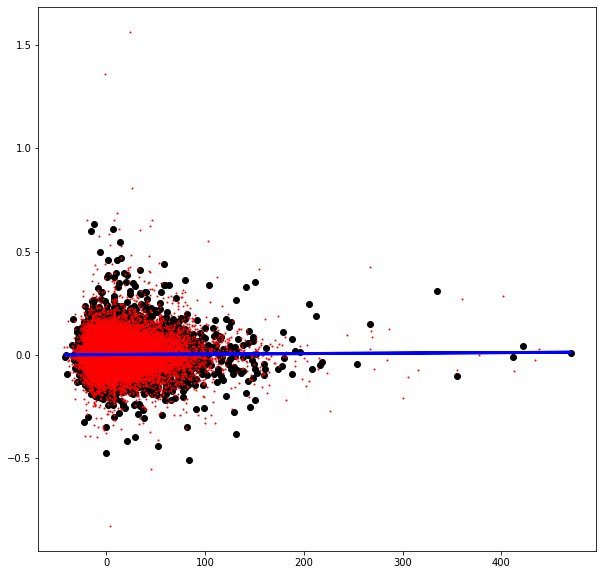

In [30]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(train_dataFrame, train_target_dataFrame, test_size=0.3, random_state=0)
model.fit(x_train, y_train)
model.predict(x_train)

plt.figure(figsize=(10, 10))

plt.scatter(x_test, y_test, color="black") # Test data
plt.scatter(x_train, y_train, color="red", s=1) # Train data

plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3) # Fitted line

plt.show()

In [ ]:
from sklearn import model_selection
from sklearn import tree
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    train_dataFrame.values, train_target_dataFrame.values, test_size=0.3, random_state=0
)

In [55]:
test_before_t221.head()

F001      F002      F003      F004       F005      F006  \
td   code                                                                 
T001 A005   7.267364  0.004896  0.945559 -0.828748   0.641026 -0.038719   
     A006  -7.477904 -0.000128  1.089255  0.042335   7.640449  0.038965   
     A007   7.622525  0.001413  1.260723  0.001667  13.735577  0.025740   
     A011  51.693204  0.000000  6.967351  0.268144 -11.543311  0.143675   
     A012  -7.707446 -0.000763  1.201887  0.285988  21.070234 -0.006894   

               F007      F008      F009      F010  ...      F037      F038  \
td   code                                          ...                       
T001 A005  0.015282 -1.015634  1.136364  0.004044  ... -1.567398  0.007646   
     A006  0.016616 -0.631765  1.010101 -0.002093  ... -1.033058 -0.001463   
     A007  0.012530  6.140861  0.862069  0.001328  ...  7.648485  0.003168   
     A011  0.033834  0.401105  0.185529  0.006380  ...  1.358087  0.037001   
     A012  0.017134  0.497051  0.833333  0.004365  ...  0.835655 -0.059726   

               F039  F040      F041      F042        F043      F044  \
td   code                                                             
T001 A005  0.002793   1.0  0.004724 -1.041667   13.357401  0.793424   
     A006 -0.002713   2.0 -0.004431  2.040816  -14.464286  0.546866   
     A007 -0.000951   6.0 -0.004544  0.000000   13.052749  0.523903   
     A011 -0.004078   2.0  0.012924 -7.142857  156.242771  1.050259   
     A012 -0.000538   5.0 -0.000045  0.000000  -17.351598  0.865144   

                 F045       F046  
td   code                         
T001 A005   11.347518   0.544470  
     A006   -4.960317   3.914780  
     A007   -1.228115   9.910044  
     A011  137.679277  -2.979930  
     A012  -17.539863  12.087614  

[5 rows x 46 columns]

In [64]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(train_dataFrame.values, train_target_dataFrame.values)

In [73]:
pred2 = clf.predict(train_after_dataFrame)
submission2 = pd.DataFrame(pred2, columns = ['target'], index = train_after_dataFrame.index)
submission2

target
td   code          
T001 A005 -0.041401
     A006 -0.010438
     A007 -0.042630
     A011  0.109743
     A012  0.058011
...             ...
T220 A792  0.002976
     A794  0.057199
     A795  0.044138
     A796 -0.000700
     A801  0.001356

[66452 rows x 1 columns]

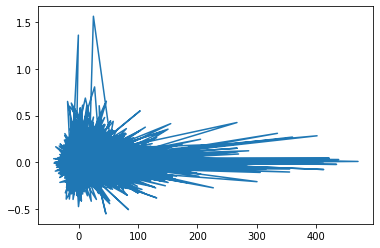

In [74]:
plt.bar(train, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()